<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Health Insurance Data)

The dataset contains information about 1300 individuals regarding medical cost. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on. 

Attribute Information:

**age**: Age of the individual

**gender**: Gender of the individual

**bmi**: Body mass index of the individual

**bp**: Systolic blood pressure in mm/hg

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**medical_cost**: Individual's medical costs billed by the insurance company

##  Table of Content

1. **[Univariate Analysis](#uni)**
2. **[Multivariate Analysis](#multi)**
3. **[Handle Non-Numeric Data](#cat)**
4. **[Normalization](#norm)**
5. **[Transformation Techniques](#trans)**

**Import the required libraries**

In [1]:
# import numpy
import numpy as np

# import pandas
import pandas as pd

# import matplotlib.pyplot
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

# to suppress the warnings
import warnings
warnings.filterwarnings('ignore')

#### Load the health insurance dataset and check the first five observations

In [2]:
# load the csv file
df_insurance = pd.read_csv('health_insurance.csv')

# display the first five observations
df_insurance.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520


### Let's begin with some hands-on practice exercises

<a id="uni"> </a>
## 1. Univariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any extreme observations present in 'bmi'? Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

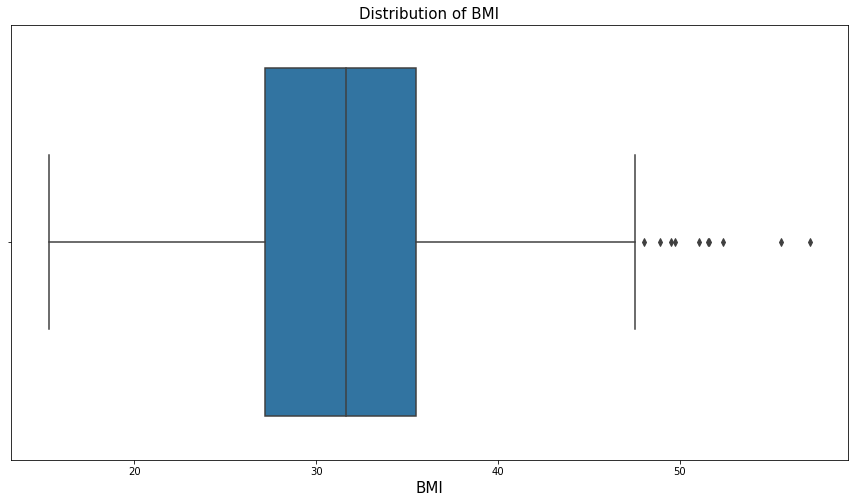

In [3]:
# set the plot size
plt.figure(figsize = (15,8))

# plot a boxplot of 'bmi'
sns.boxplot(df_insurance['bmi'])

# add plot and axis label
# set text size using 'fontsize'
plt.xlabel('BMI', fontsize = 15)
plt.title('Distribution of BMI', fontsize = 15)

# display the plot
plt.show()

We can detect the outliers in the univariate data, by plotting the boxplot. The above plot shows the presence of outliers above the upper whisker.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is the variable 'age' skewed? Support your answer with a plot and metric</b>
                </font>
            </div>
        </td>
    </tr>
</table>

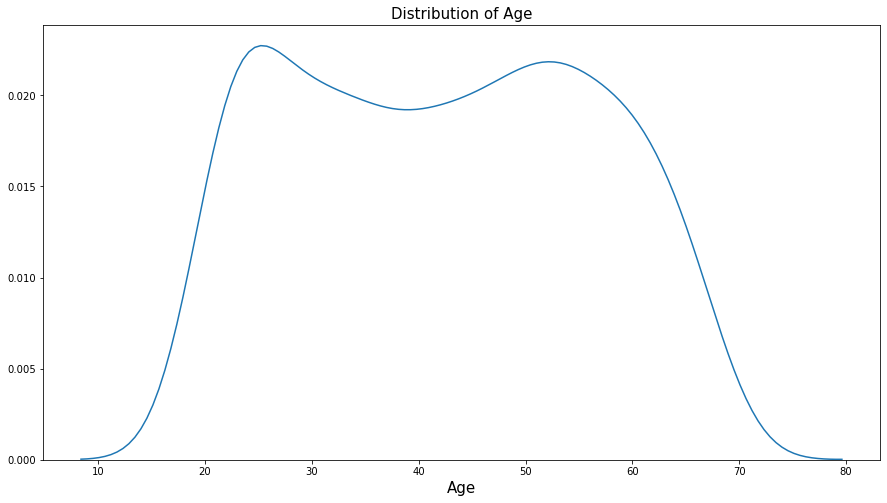

In [4]:
# set the plot size
plt.figure(figsize = (15,8))

# plot a density plot to check the skewness
# 'hist = False' will not plot a histogram
sns.distplot(df_insurance['age'], hist = False)

# add the plot and axis label
# set text size using 'fontsize'
plt.xlabel('Age', fontsize = 15)
plt.title('Distribution of Age', fontsize = 15)

# display the plot
plt.show()

In [5]:
# find the skewness using skew()
df_insurance['age'].skew()

0.04359793424360781

From the plot and the coefficient of skewness, we can see that there is no skewness in 'age'.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the probability that the individuals have charged less than 25k for medical treatment? Support your answer with the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

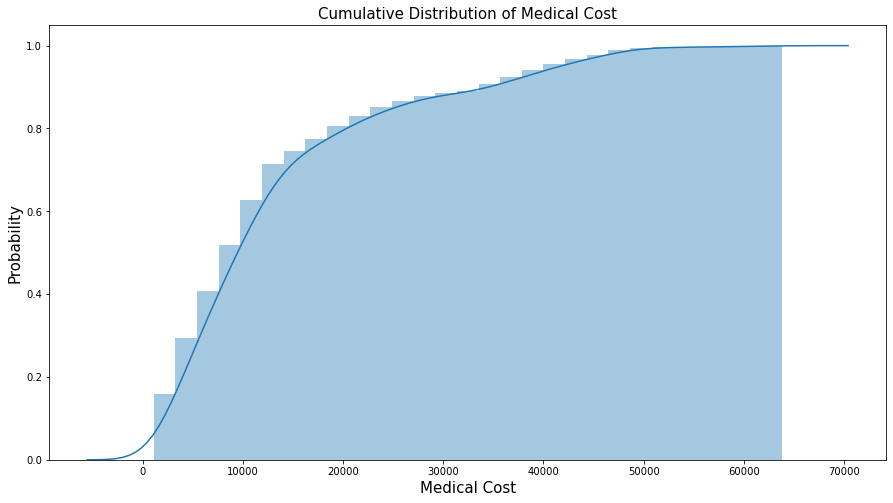

In [6]:
# set the plot size
plt.figure(figsize = (15,8))

# 'cumulative=True' returns the cumulative distribution to find the probability
# pass keyword arguments for histogram and kde to 'hist_kws' and 'kde_kws' respectively
sns.distplot(df_insurance.medical_cost, hist_kws = dict(cumulative=True), kde_kws = dict(cumulative=True))

# add the plot and axis label
# set text size using 'fontsize'
plt.xlabel('Medical Cost', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Cumulative Distribution of Medical Cost', fontsize = 15)

# display the plot
plt.show()

Nearly 85% of the individuals have insurance cost less than 25k. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Draw the line for mean and median on the distribution plot and identify the type of skewness for BMI</b>
                </font>
            </div>
        </td>
    </tr>
</table>

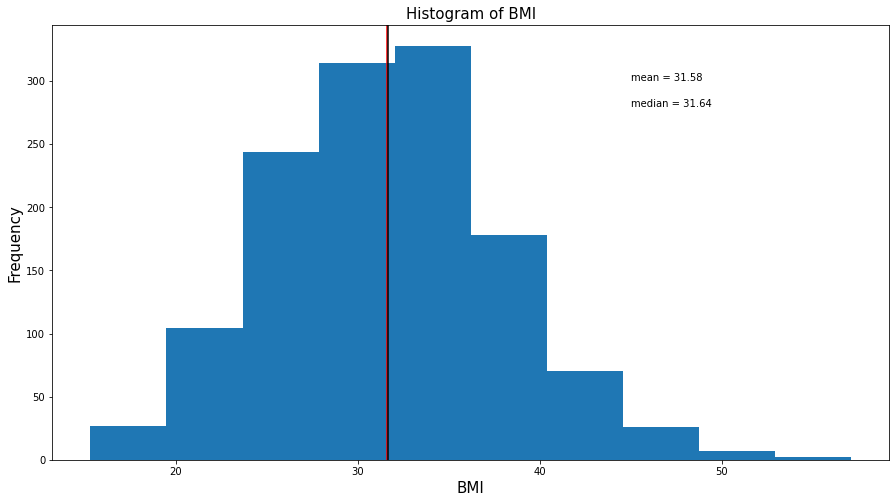

In [7]:
# set the figure size
plt.figure(figsize= (15,8))

# plot a histogram
plt.hist(df_insurance['bmi'])

# plot a lines for mean, median 
# specify color for the line using 'color' parameter
plt.axvline(df_insurance['bmi'].mean(), color='red')
plt.axvline(df_insurance['bmi'].median(), color='black')

# add the values in the plot
# 'x' and 'y' represents the position of the text
# 's' represents the text
plt.text(x = 45, y = 300, s = 'mean ='+' '+ str(round(df_insurance['bmi'].mean(),2)))
plt.text(x = 45, y = 280, s = 'median ='+' '+ str(round(df_insurance['bmi'].median(),2)))

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Histogram of BMI', fontsize = 15)
plt.xlabel('BMI', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

The mean is approximately equal to the median. It is also seen that, the data is nearly symmetric. Thus, we may saythat the BMI is near normal distributed.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of medical cost using violin plot and describe its distribution</b>
                </font>
            </div>
        </td>
    </tr>
</table>

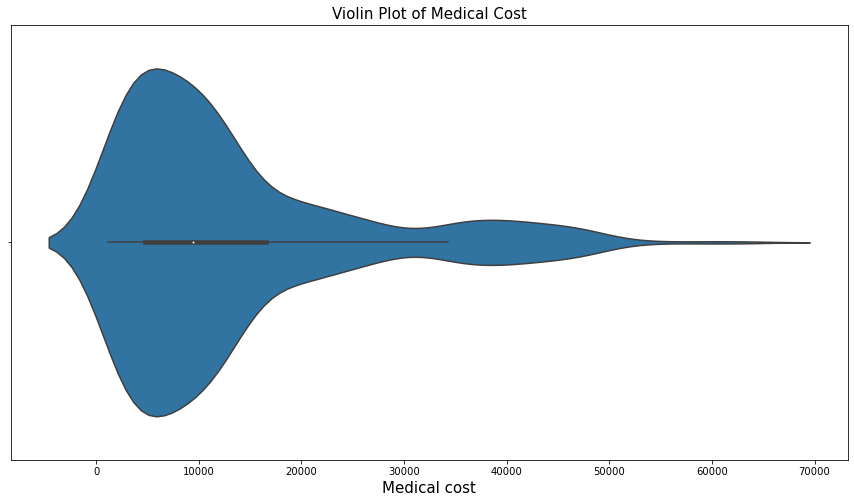

In [8]:
# set the plot size
plt.figure(figsize = (15,8))

# plot a violin plot
sns.violinplot(df_insurance['medical_cost'])

# add plot and axis label
# set text size using 'fontsize'
plt.xlabel('Medical cost', fontsize = 15)
plt.title('Violin Plot of Medical Cost', fontsize = 15)

# display the plot
plt.show()

The violin plot shows the positive skewness of the variable 'medical_cost'. Most of the individuals have charges below 10k.

<a id="multi"> </a>
## 2. Multivariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is there any individual with age less than 30 and meadical cost greater than 40k?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# pass the conditions for age and medical_cost to find such individuals
df_insurance[(df_insurance['age'] < 30 ) & (df_insurance['medical_cost'] > 40000)]

,age,gender,bmi,bp,children,region,smoker,medical_cost
254,26,F,47.54,156,2,northeast,smoker,42112.2356
1009,25,F,55.58,152,1,northeast,smoker,44501.3982
1086,26,M,41.75,152,1,northeast,smoker,40904.1995


We can see that there are 3 individuals with age less than 30 and medical cost more than 40k. All such individuals are smokers with high BMI and bp, which may suggest the medical complications that lead to a high amount of medical charges.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the scatter plot of BMI and medical cost reveal potential outliers?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

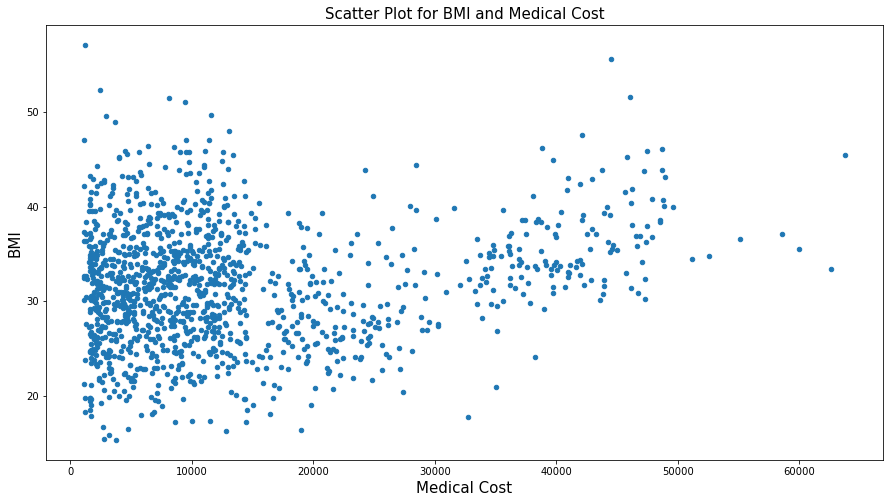

In [10]:
# scatter plot for 'bmi' and 'medical cost'
# set the figure size using 'figsize'
df_insurance.plot.scatter(x = 'medical_cost', y = 'bmi', figsize=(15, 8))

# set axes and plot labels
# set text size using 'fontsize'
plt.title('Scatter Plot for BMI and Medical Cost', fontsize = 15)
plt.xlabel('Medical Cost', fontsize = 15)
plt.ylabel('BMI', fontsize = 15)

# display the plot
plt.show()

The above scatter plot shows the presence of extreme observations where the medical charges are more than 55k. Also, the outliers are present for individuals with a BMI greater than 50.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Determine the percentage variation in BMI for males and females

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# find mean and standard deviation of BMI using groupby() for each gender
mu =df_insurance.groupby(['gender'])['bmi'].mean()
sigma = df_insurance.groupby(['gender'])['bmi'].std()

# compute coefficient of variation
cv = sigma/np.abs(mu)*100
cv

gender
F    20.120029
M    20.118324
Name: bmi, dtype: float64

From the output, we can say that the coefficient of variation for females is approximately equal to that of males.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Which region has the highest number of males?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# create a crosstab to get the region-wise count of males and females
# 'margins = True' returns the total of each row/column 
pd.crosstab(df_insurance["gender"], df_insurance["region"], margins = True)

region,northeast,northwest,southeast,southwest,All
gender,,,,,
F,174,149,178,156,657
M,141,166,178,158,643
All,315,315,356,314,1300


The region 'southeast' has the highest count of males. Also, the count of females is highest in this region.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Analyze the pairwise relationship between the numeric variables
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

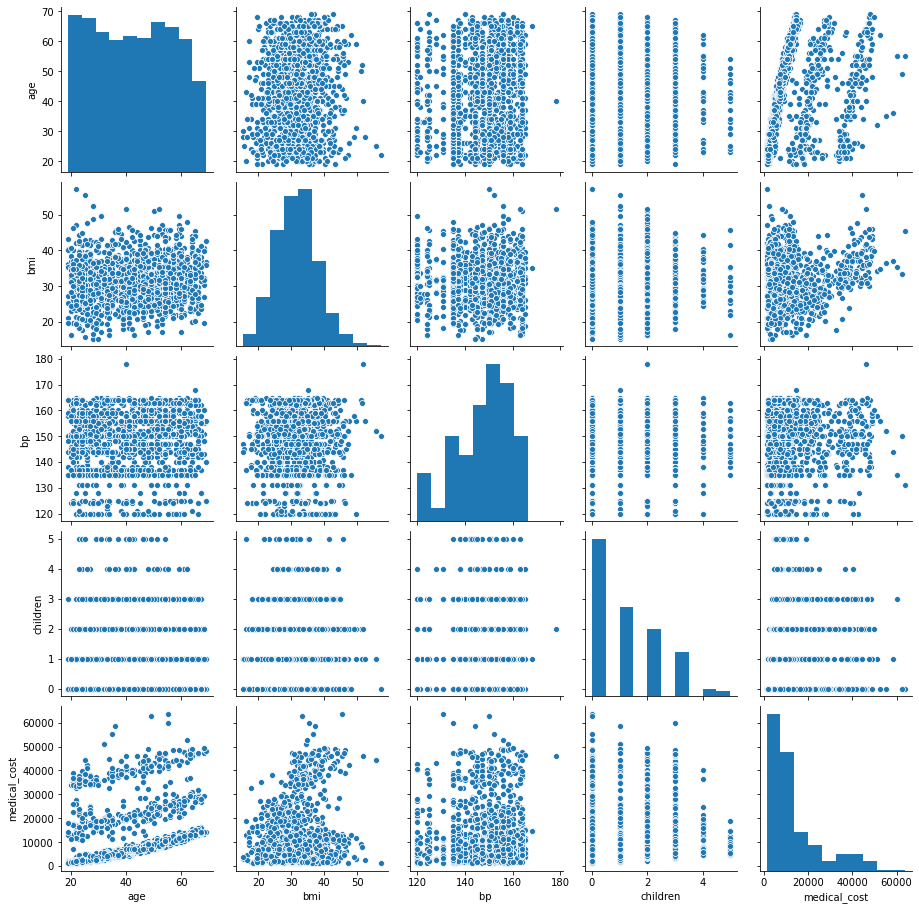

In [13]:
# pairplot() returns a matrix of scatter plots 
sns.pairplot(df_insurance)

# display the plot
plt.show()

The plot shows that the BMI of a person is not dependent on age.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Are the medical costs affected by an individual's smoking habits?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

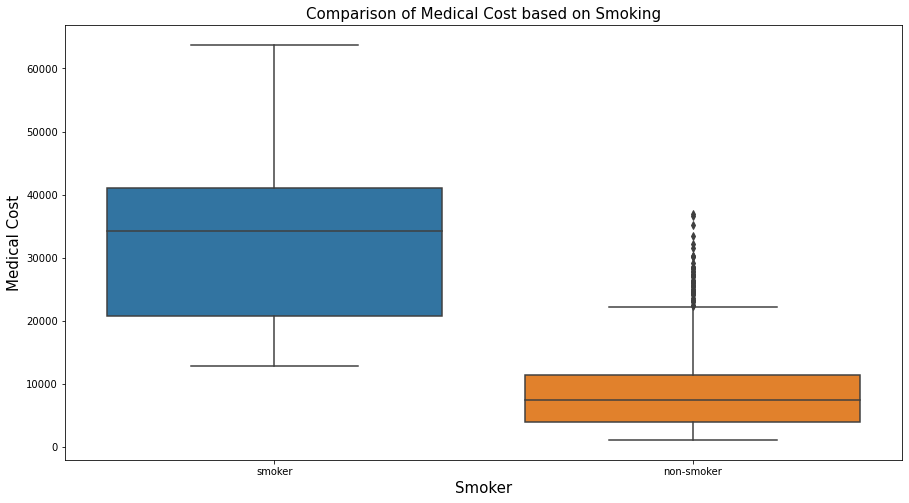

In [14]:
# set the plot size
plt.figure(figsize = (15,8))

# plot boxplot to compare medical_cost based on smoking habit
sns.boxplot(x = 'smoker', y = 'medical_cost', data = df_insurance)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Comparison of Medical Cost based on Smoking', fontsize = 15)
plt.xlabel('Smoker', fontsize = 15)
plt.ylabel('Medical Cost', fontsize = 15)

# display the plot
plt.show()

From the above plot, we can observe that there is a significant difference between the medical cost for smokers and non-smokers. The cost for smokers are relatively higher than for non-smokers. Also, we can observe that some outliers are present in the distribution of non-smokers, which may indicate several other health issues.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Check if the region of residence and age of the individuals have an impact on the medical cost? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

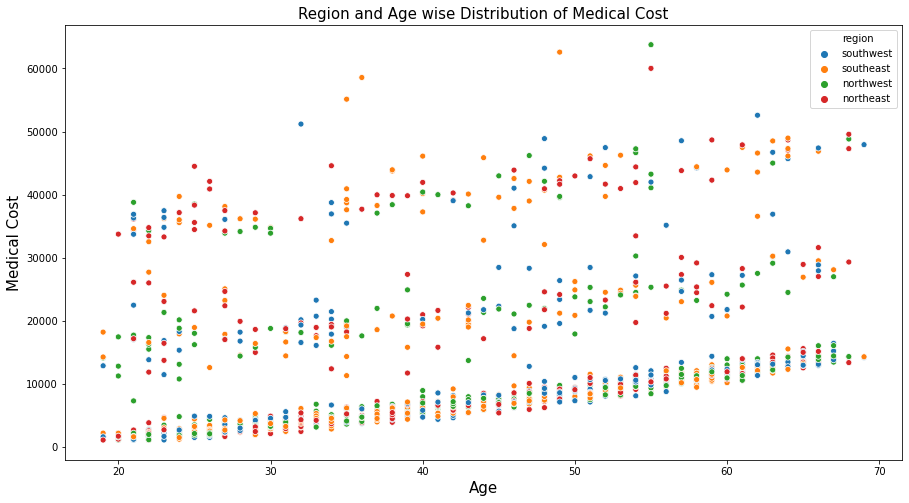

In [15]:
# set the fighure size
plt.figure(figsize=(15,8))

# use 'hue' to add the variable 'region' in the scatter plot
sns.scatterplot('age', 'medical_cost', hue = 'region', data = df_insurance)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Region and Age wise Distribution of Medical Cost', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Medical Cost', fontsize = 15)

# display the plot
plt.show()

It can be observed that there is no significant impact of the 'region' on medical cost. But, 'age' and 'medical_cost' have a positive relationship.

<a id="cat"> </a>
## 3. Handle Non-Numeric Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a dummy variable for each category in 'region' 
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# retrieve the unique categories in 'region'
df_insurance.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

The region is divided into four unique categories.

In [17]:
# create a dummy variable for each category 
# 'get_dummies' is pandas function to create dummy variables
pd.get_dummies(df_insurance['region']).head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [18]:
# OR
# use OneHotEncoder from sklearn 

# import the OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# instantiate the encoder
onehotencoder = OneHotEncoder()

# fit the encoder 'fit_transform'
# 'toarray()' converts the values to array 
# 'encoded' returns an array of encoded variables
encoded = onehotencoder.fit_transform(df_insurance.region.values.reshape(-1,1)).toarray()

# create a dataframe of encoded columns
df_encoded = pd.DataFrame(encoded, columns = ['northeast', 'northwest', 'southeast', 'southwest'])

df_encoded.head()

,northeast,northwest,southeast,southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


Both the above methods have created the dummy variables for each region. The '1' in the first observation represents that the individual is from the 'southwest' region.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

We have to assign a unique label to each category in 'smoker'. For this, we use 'LabelEncoder' from sklearn to perform the label encoding.

In [19]:
# import the LabelEncoder
from sklearn.preprocessing import LabelEncoder

# instantiate the encoder
labelencoder = LabelEncoder()

# fit the encoder using 'fit_transform'
df_insurance['smoker_label'] = labelencoder.fit_transform(df_insurance.smoker)

# print the first five observations
df_insurance.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0


Here, we have labeled a smoker as '1' and a non-smoker as '0'.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# frequency encoding on 'gender'
# size of each category
encoding = df_insurance.groupby('gender').size()

# get frequency of each category
encoding = encoding/len(df_insurance)

# create a column
# map() maps the frequency of gender to each observation
df_insurance['freq_encoded_gender'] = df_insurance.gender.map(encoding)
df_insurance.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label,freq_encoded_gender
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1,0.494615
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0,0.505385
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0,0.505385
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0,0.505385
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0,0.505385


The newly created column 'freq_encoded_gender' shows that, there are 49.46% males and 50.54% females in the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Create a variable such that the value '1' indicates that the individual is a smoker and '0' indicates a non-smoker</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# create a dummy variables for 'smoker'
# 'drop_first = True' creates (n-1 = 1) dummy variables from (n = 2) categories 
pd.get_dummies(df_insurance['smoker'], drop_first = True).head()

,smoker
0,1
1,0
2,0
3,0
4,0


<a id="norm"> </a>
## 4. Normalization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# use StandardScaler to normalize the variable
# import StandardScaler
from sklearn.preprocessing import StandardScaler

# instantiate the standardscaler
standard_scale = StandardScaler()

# fit the StandardScaler using 'fit_transform'
scaled_bmi = standard_scale.fit_transform(df_insurance[['bmi']])

# mean and variance of transformed data
print('Mean:', scaled_bmi.mean())
print('Variance', scaled_bmi.var())

Mean: -4.837156316520682e-16
Variance 1.0000000000000002


The scaled_bmi have mean zero and unit variance.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check the range of 'age' and transform the values such that the range will be 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# minimum and maximum of original data
print('Maximum:', df_insurance.age.max())
print('Minimum:', df_insurance.age.min())

Maximum: 69
Minimum: 19


We can see that the range of age is 50. To transform the range to 1; use the min-max normalization technique.

In [24]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# instantiate the MinMaxScaler
min_max = MinMaxScaler()

# fit the MinMaxScaler using 'fit_transform'
transformed_age = min_max.fit_transform(df_insurance[['age']])

# minimum and maximum of normalized data
print('Maximum:', transformed_age.max())
print('Minimum:', transformed_age.min())

Maximum: 1.0
Minimum: 0.0


The transformed variable has range 1.

<a id="trans"> </a>
## 5. Transformation Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check the skewness for 'medical_cost'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# coefficient of skewness for 'medical_cost'
df_insurance.medical_cost.skew()

1.5341854555059413

The coefficient of skewness is positive, which implies that the data is positively skewed. We use log transformation to reduce the skewness in the data.

In [26]:
# apply natural log transformation (with base 'e')
df_insurance['log_medical_cost'] = np.log(df_insurance['medical_cost'])

# coefficient of skewness of trnsformed data
print('Skewness of transformed data:', df_insurance['log_medical_cost'].skew())

Skewness of transformed data: -0.09331493541417475


The coefficient of skewness for transformed data is near zero, which means the log transformation has reduced the skewness in the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Transform the 'log_medical_cost' values to the original scale and compare the 'medical_cost' and the transformed data</b>
                </font>
            </div>

</td>
    </tr>
</table>

       medical_cost  exp_medical_cost
count   1300.000000       1300.000000
mean   13243.214691      13243.214691
std    12060.371167      12060.371167
min     1121.873900       1121.873900
25%     4760.155950       4760.155950
50%     9388.753650       9388.753650
75%    16579.959052      16579.959052
max    63770.428010      63770.428010


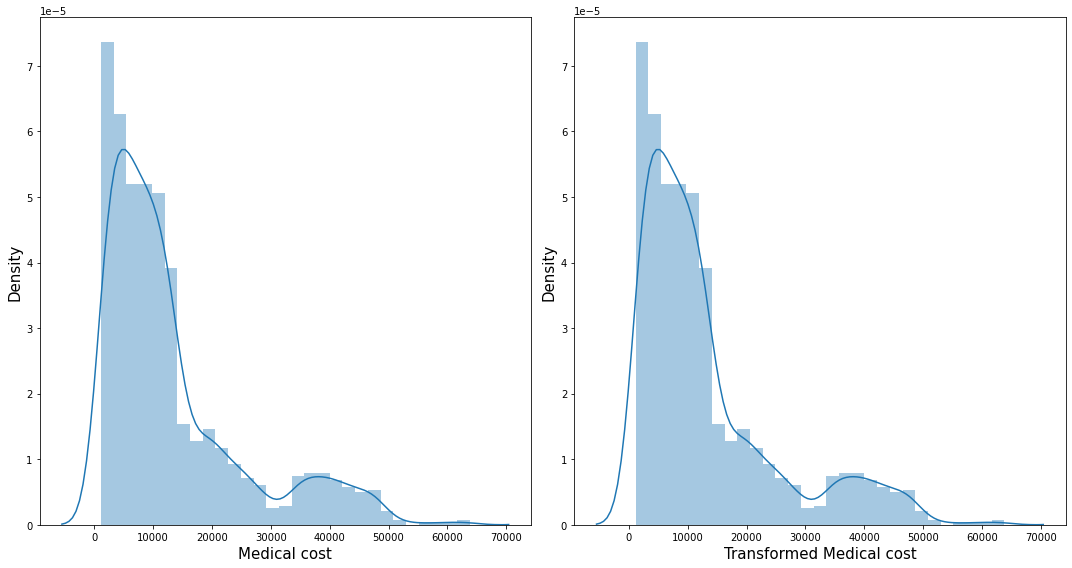

In [27]:
# set the plot size
plt.figure(figsize = (15,8))

# use the exponential transformtion to transform the 'log_medical_cost' data
df_insurance['exp_medical_cost'] = np.exp(df_insurance['log_medical_cost'])

# statistical summary of 'medical_cost' and 'exp_medical_cost'
print(df_insurance[['medical_cost', 'exp_medical_cost']].describe())

# plot the distribution of 'medical_cost' and 'exp_medical_cost'
# subplot is used to create a set of plots
# we create 1 row of 2 columns 
# use first column for plotting
plt.subplot(1,2,1)
sns.distplot(df_insurance['medical_cost'])
plt.xlabel('Medical cost', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# use second column for plotting
plt.subplot(1,2,2)
sns.distplot(df_insurance['exp_medical_cost'])
plt.xlabel('Transformed Medical cost', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

The above output shows that the exponential transformation of the 'log_medical_cost' transforms the data to the original scale of 'medical_cost'. 